In [1]:
import pandas as pd
import yfinance as yf 
import seaborn as sns

In [2]:
from datetime import datetime, timedelta
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [3]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [5]:
google_data.shape

(4962, 6)

In [6]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4.962000e+03
mean,43.689231,44.152076,43.249873,43.710497,43.710497,1.169050e+08
std,41.091486,41.555094,40.680276,41.126599,41.126599,1.502836e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.946722,13.099400,12.820010,12.957806,12.957806,2.786300e+07
50%,26.856638,27.028500,26.622851,26.835750,26.835750,5.778190e+07
75%,59.270626,59.822124,58.747063,59.338999,59.338999,1.449563e+08
max,175.990005,176.419998,171.399994,173.690002,173.690002,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4962 entries, 2004-08-19 to 2024-05-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4962 non-null   float64
 1   High       4962 non-null   float64
 2   Low        4962 non-null   float64
 3   Close      4962 non-null   float64
 4   Adj Close  4962 non-null   float64
 5   Volume     4962 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.4 KB


In [8]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

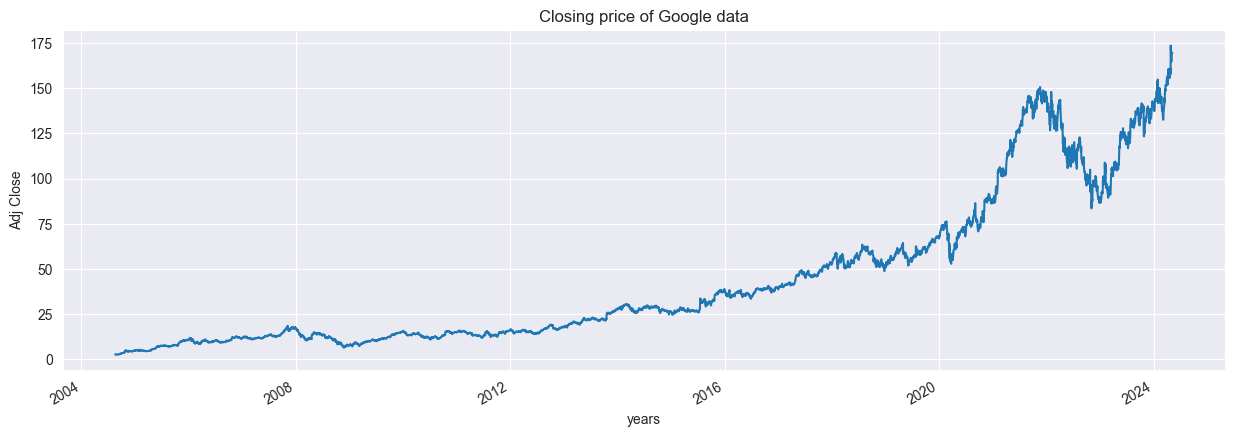

In [10]:
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [11]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

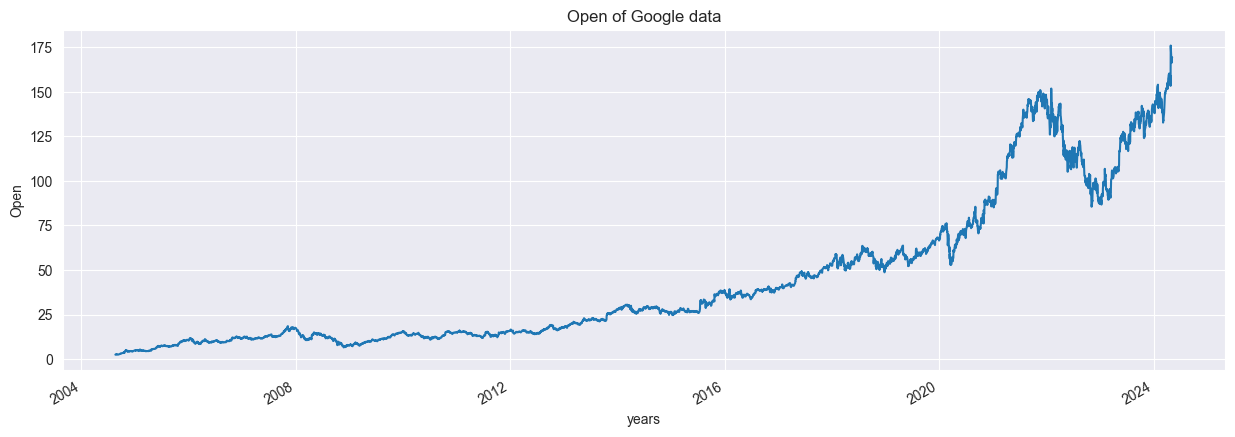

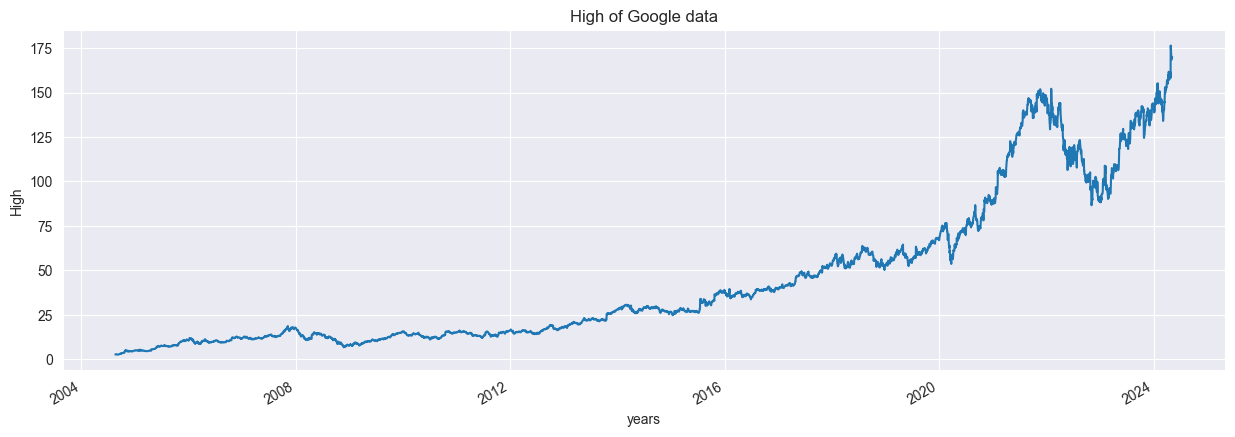

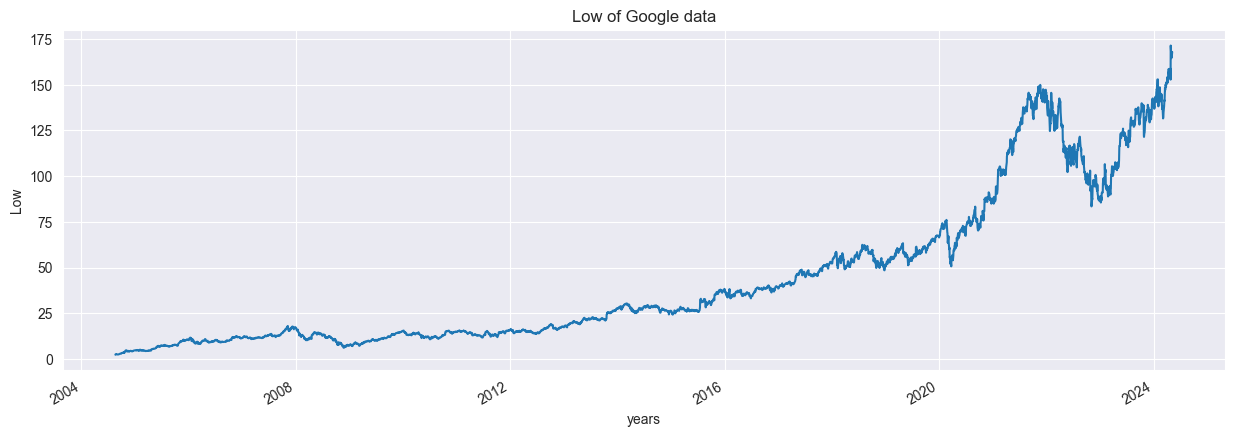

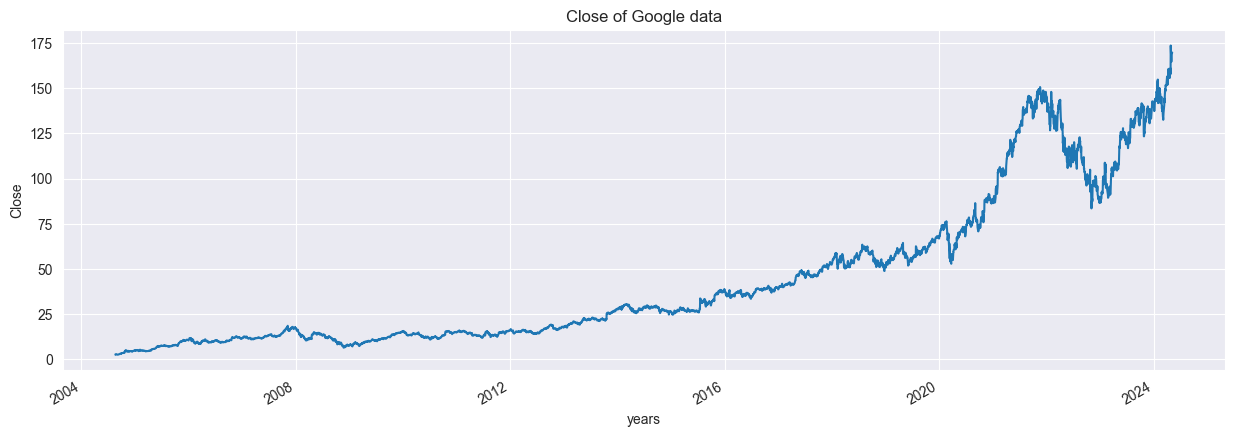

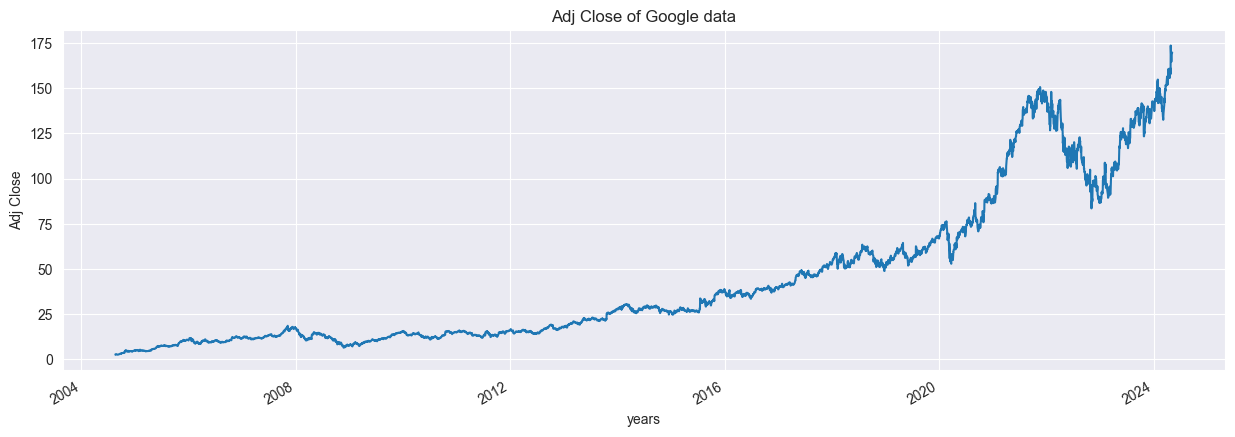

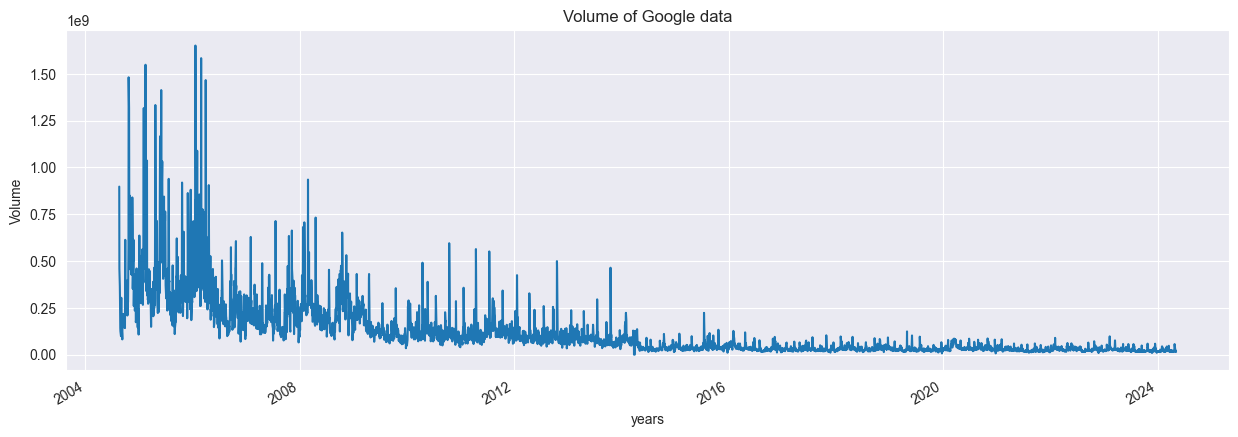

In [12]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

## Moving Average 

In [13]:
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 87


Tutaj sprawdzaliśmy ile razy zarejestrowano akcje w każdym roku, generalnie około 250 bo rejestrują się tylko w dni tygodnia, w weekendy nie. 

In [14]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

rolling oznacza tworzenie okna czasowego, które bierze dla każdego punktu 250 poprzednich rekordów 

In [15]:
google_data

,Open,High,Low,Close,Adj Close,Volume,MA_for_250_days
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,NaN
...,...,...,...,...,...,...,...
2024-04-30,167.380005,169.869995,164.500000,164.639999,164.639999,29420800,135.91650
2024-05-01,166.179993,168.809998,164.899994,165.570007,165.570007,25223200,136.15430
2024-05-02,166.669998,168.529999,165.690002,168.460007,168.460007,17041100,136.40730


In [16]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

<Figure size 640x480 with 0 Axes>

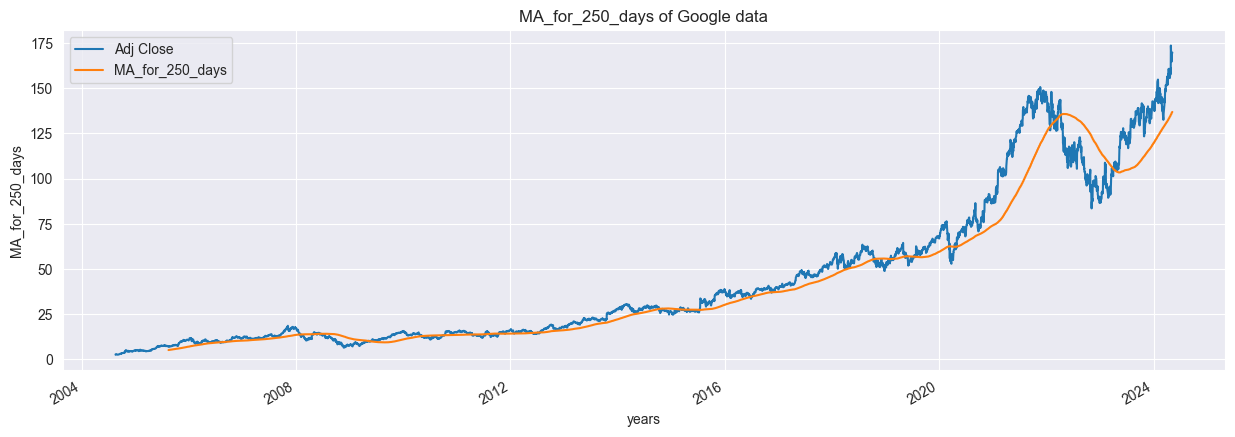

In [17]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

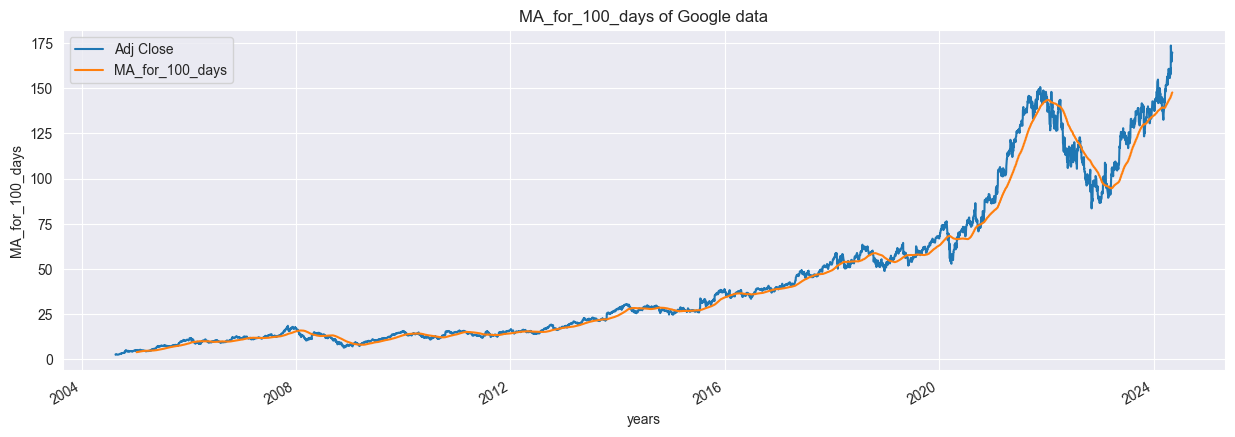

In [18]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

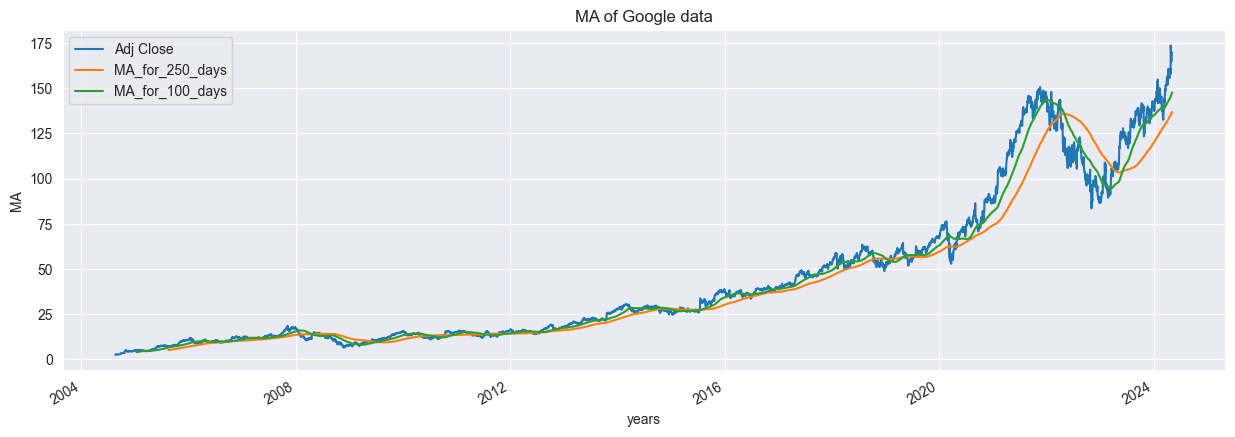

In [19]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days','MA_for_100_days']], 'MA')

# Risk of the stock

In [20]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.499133,NaN
2004-08-20,2.697639,0.079430
2004-08-23,2.724787,0.010064
2004-08-24,2.611960,-0.041408
2004-08-25,2.640104,0.010775


Percentage change to jak procentowo zmienia się kwota zamknięcia. 

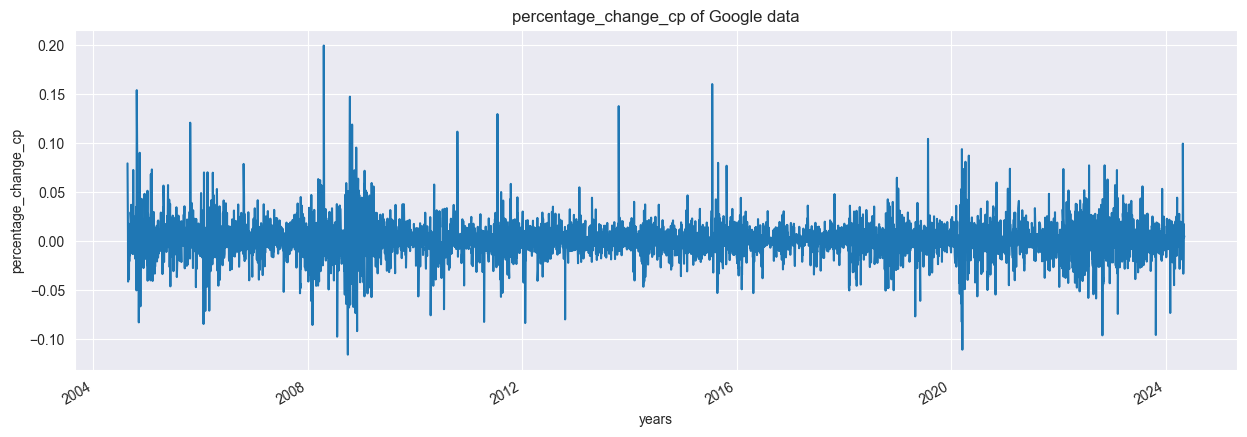

In [21]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

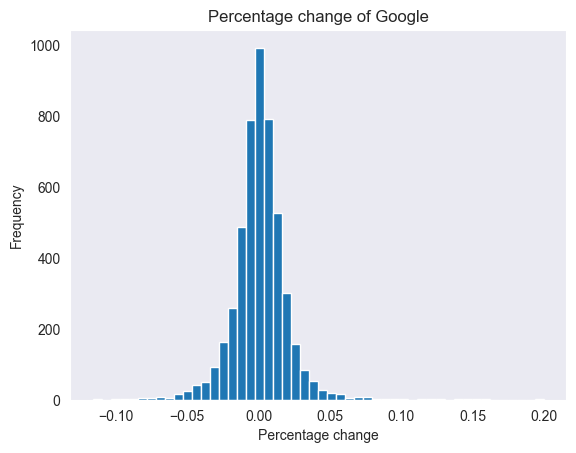

In [22]:
plt.hist(google_data['percentage_change_cp'], bins=50)
plt.title('Percentage change of Google')
plt.xlabel('Percentage change')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Model

In [23]:
Adj_close_price = google_data[['Adj Close']]

In [24]:
(max(Adj_close_price.values), min(Adj_close_price.values))

(array([173.69000244]), array([2.49091291]))

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.80154176e-05],
       [1.20751854e-03],
       [1.36609420e-03],
       ...,
       [9.69450797e-01],
       [9.72546601e-01],
       [9.77453148e-01]])

In [26]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np 
x_data, y_data = np.array(x_data), np.array(y_data)

In [27]:
x_data[0], y_data[0]

(array([[4.80154176e-05],
        [1.20751854e-03],
        [1.36609420e-03],
        [7.07054110e-04],
        [8.71448216e-04],
        [1.14932293e-03],
        [8.93270874e-04],
        [2.90971091e-04],
        [3.43344077e-04],
        [3.49190376e-05],
        [2.18226577e-04],
        [0.00000000e+00],
        [2.28412341e-04],
        [3.33162491e-04],
        [3.34616406e-04],
        [7.73975999e-04],
        [1.08967340e-03],
        [1.67015610e-03],
        [1.74435035e-03],
        [2.03095134e-03],
        [2.54305683e-03],
        [2.81510892e-03],
        [2.59397451e-03],
        [2.67253190e-03],
        [3.02751705e-03],
        [2.88348612e-03],
        [2.65507935e-03],
        [3.90623624e-03],
        [4.52017709e-03],
        [4.30485974e-03],
        [4.73840228e-03],
        [5.09919752e-03],
        [5.58074851e-03],
        [5.39307783e-03],
        [5.65057962e-03],
        [5.48764082e-03],
        [5.12829811e-03],
        [5.43963237e-03],
        [5.9

In [28]:
int(len(x_data)*0.7)

3403

In [29]:
4908-100-int(len(x_data)*0.7)

1405

In [30]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3403, 100, 1)
(3403, 1)
(1459, 100, 1)
(1459, 1)


In [32]:
from tensorflow.keras.layers import LSTM, Dense

In [33]:
from keras import Sequential

In [34]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))    

C:\Users\HP\PycharmProjects\stock_predicttion\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### batch_size - Określa liczbę przykładów treningowych, które będą przetwarzane jednocześnie podczas jednej iteracji procesu uczenia. Wartość batch_size=1 oznacza, że każdy przykład treningowy będzie przetwarzany osobno, co jest nazywane trenowaniem online (ang. online learning). Inne wartości, np. batch_size=32 lub batch_size=64, oznaczają, że dane treningowe zostaną podzielone na porcje (batche) o odpowiednim rozmiarze.
#### epochs- Określa liczbę epok, czyli liczba pełnych przejść przez cały zestaw danych treningowych. Każda epoka składa się z jednego lub więcej batchy, zależnie od wartości batch_size. Podanie epochs=2 oznacza, że model będzie uczony na całym zestawie danych treningowych przez dwie epoki

In [36]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3403/3403 ━━━━━━━━━━━━━━━━━━━━ 270s 76ms/step - loss: 2.3499e-04
Epoch 2/2
3403/3403 ━━━━━━━━━━━━━━━━━━━━ 160s 47ms/step - loss: 5.2017e-05


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [38]:
predictions = model.predict(x_test)
predictions

46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step


array([[0.33288783],
       [0.33157325],
       [0.33041662],
       ...,
       [0.91999096],
       [0.9273562 ],
       [0.9354827 ]], dtype=float32)

In [39]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 59.481003],
       [ 59.25595 ],
       [ 59.057934],
       ...,
       [159.99252 ],
       [161.25345 ],
       [162.6447  ]], dtype=float32)

In [40]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.34799957],
       [ 59.24549866],
       [ 60.27500153],
       ...,
       [168.46000671],
       [168.99000549],
       [169.83000183]])

In [41]:
inv_y_test.shape

(1459, 1)

In [42]:
inv_y_test.reshape(-1).shape

(1459,)

In [43]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [44]:
rmse

2.6674819171255417

In [45]:
import pandas as pd
ploting_data = pd.DataFrame(
    {
        'orginal_test_data': inv_y_test.reshape(-1), 
        'predictions': inv_predictions.reshape(-1)
    }, 
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,orginal_test_data,predictions
Date,,
2018-07-19,59.348000,59.481003
2018-07-20,59.245499,59.255951
2018-07-23,60.275002,59.057934
2018-07-24,62.403999,59.568436
2018-07-25,63.185001,61.124310


In [46]:
tuple(google_data.iloc[1].values)

(2.515820026397705,
 2.7168169021606445,
 2.5031180381774902,
 2.697638988494873,
 2.697638988494873,
 458857488.0,
 nan,
 nan,
 0.07942989417030355)

<Figure size 640x480 with 0 Axes>

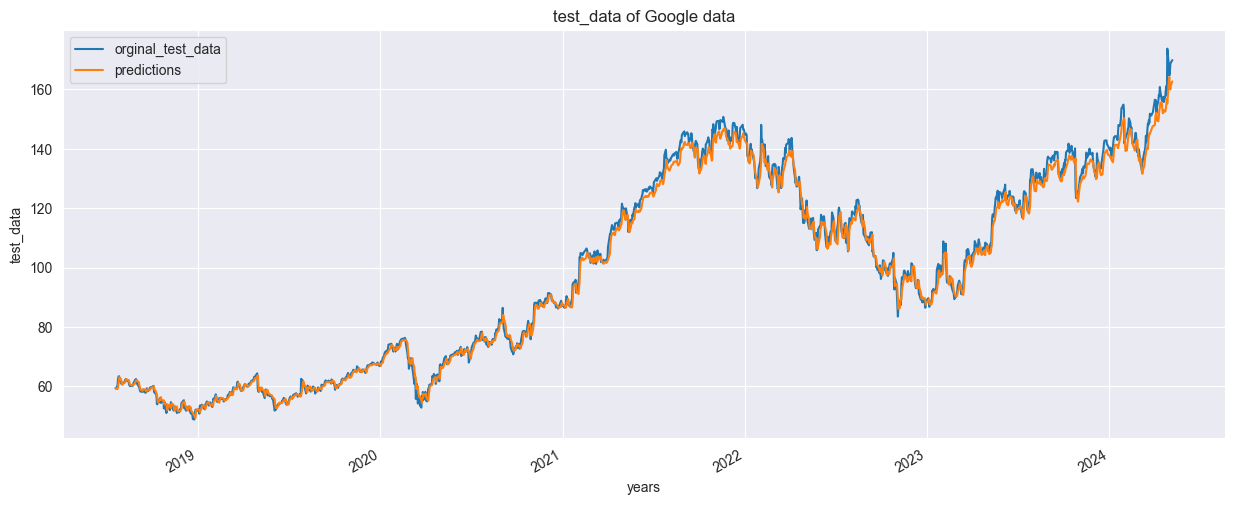

In [47]:
plot_graph((15,6), ploting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

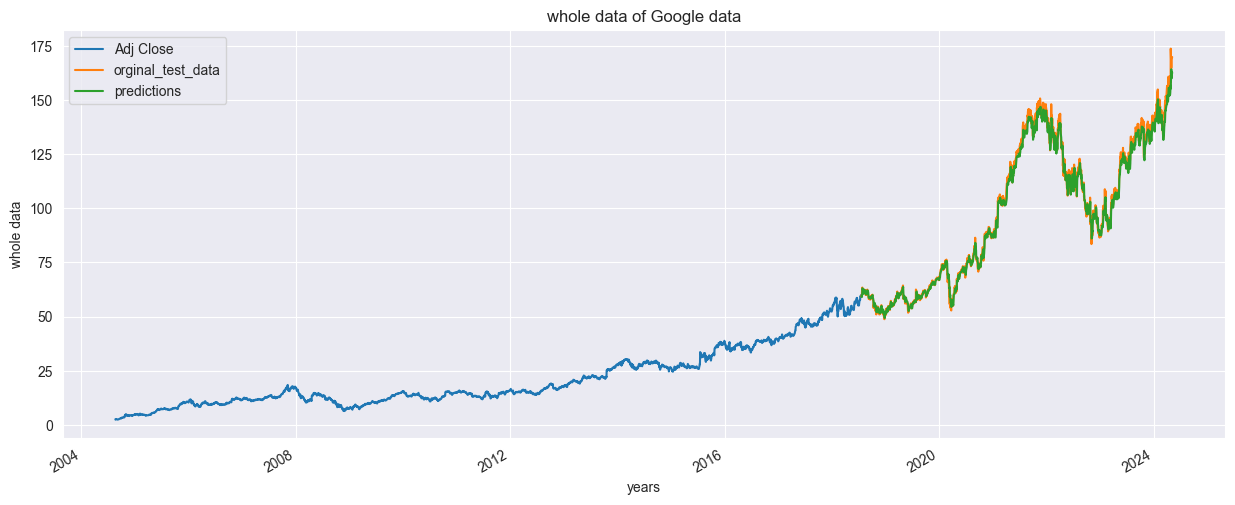

In [48]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis=0), 'whole data')

In [49]:
model.save("Latest_stock_price_model.keras")

# Predicting stock prices for the next 5 years 

In [50]:
now = datetime.now()

# Utwórz pustą listę do przechowywania dat
list_date = []

# Wygeneruj daty dla następnych 3 lat, pomijając weekendy
for i in range(3*365+1):
    new_date = now + timedelta(days=i)
    if new_date.weekday() < 5:  # Jeśli dzień tygodnia jest od 0 do 4 (poniedziałek do piątek)
        list_date.append(new_date)
        
for i in range(len(list_date)):
    list_date[i] = list_date[i].strftime('%Y-%m-%d')
list_date

['2024-05-07',
 '2024-05-08',
 '2024-05-09',
 '2024-05-10',
 '2024-05-13',
 '2024-05-14',
 '2024-05-15',
 '2024-05-16',
 '2024-05-17',
 '2024-05-20',
 '2024-05-21',
 '2024-05-22',
 '2024-05-23',
 '2024-05-24',
 '2024-05-27',
 '2024-05-28',
 '2024-05-29',
 '2024-05-30',
 '2024-05-31',
 '2024-06-03',
 '2024-06-04',
 '2024-06-05',
 '2024-06-06',
 '2024-06-07',
 '2024-06-10',
 '2024-06-11',
 '2024-06-12',
 '2024-06-13',
 '2024-06-14',
 '2024-06-17',
 '2024-06-18',
 '2024-06-19',
 '2024-06-20',
 '2024-06-21',
 '2024-06-24',
 '2024-06-25',
 '2024-06-26',
 '2024-06-27',
 '2024-06-28',
 '2024-07-01',
 '2024-07-02',
 '2024-07-03',
 '2024-07-04',
 '2024-07-05',
 '2024-07-08',
 '2024-07-09',
 '2024-07-10',
 '2024-07-11',
 '2024-07-12',
 '2024-07-15',
 '2024-07-16',
 '2024-07-17',
 '2024-07-18',
 '2024-07-19',
 '2024-07-22',
 '2024-07-23',
 '2024-07-24',
 '2024-07-25',
 '2024-07-26',
 '2024-07-29',
 '2024-07-30',
 '2024-07-31',
 '2024-08-01',
 '2024-08-02',
 '2024-08-05',
 '2024-08-06',
 '2024-08-

# Correlation between stocks 

In [51]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

ld = AAPL.index

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [52]:
df_close = pd.DataFrame(columns=tech_list, index=ld)
df_close['AAPL'] = AAPL['Close']
df_close['AMZN'] = AMZN['Close']
df_close['GOOG'] = GOOG['Close']
df_close['MSFT'] = MSFT['Close']
df_close

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2014-05-07,21.154642,25.428186,39.419998,14.635500
2014-05-08,20.999643,25.480045,39.639999,14.416000
2014-05-09,20.912144,25.865486,39.540001,14.612000
2014-05-12,21.172501,26.423454,39.970001,15.143000
2014-05-13,21.205713,26.581520,40.419998,15.232000
...,...,...,...,...
2024-04-30,170.330002,164.639999,389.329987,175.000000
2024-05-01,169.300003,165.570007,394.940002,179.000000
2024-05-02,173.029999,168.460007,397.839996,184.720001


In [53]:
df_cp = pd.DataFrame(columns=tech_list, index=ld)
AAPL['percentage_change_cp'] = AAPL['Adj Close'].pct_change()
AMZN['percentage_change_cp'] = AMZN['Adj Close'].pct_change()
GOOG['percentage_change_cp'] = GOOG['Adj Close'].pct_change()
MSFT['percentage_change_cp'] = MSFT['Adj Close'].pct_change()
df_cp['AAPL'] = AAPL[['percentage_change_cp']]
df_cp['AMZN'] = AMZN[['percentage_change_cp']]
df_cp['GOOG'] = GOOG[['percentage_change_cp']]
df_cp['MSFT'] = MSFT[['percentage_change_cp']]
df_cp

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2014-05-07,NaN,NaN,NaN,NaN
2014-05-08,-0.001783,0.002039,0.005581,-0.014998
2014-05-09,-0.004167,0.015127,-0.002523,0.013596
2014-05-12,0.012450,0.021572,0.010875,0.036340
2014-05-13,0.001568,0.005982,0.018393,0.005877
...,...,...,...,...
2024-04-30,-0.018271,-0.019416,-0.032119,-0.032935
2024-05-01,-0.006047,0.005649,0.014409,0.022857
2024-05-02,0.022032,0.017455,0.007343,0.031955


# Correlations

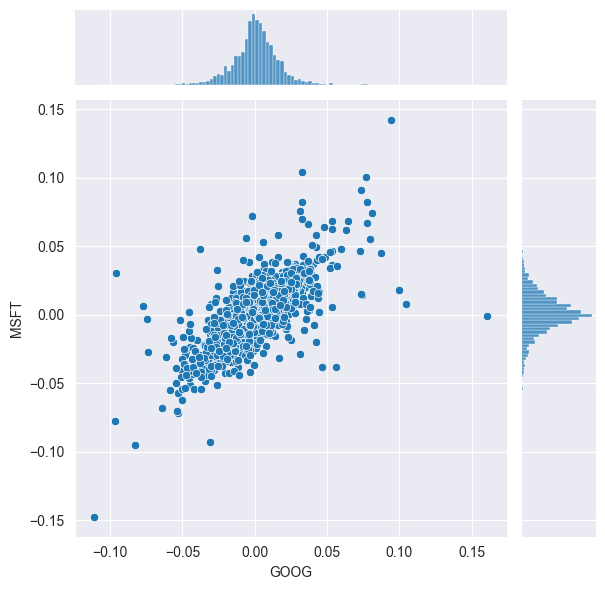

In [55]:
sns.jointplot(x='GOOG', y='MSFT', data=df_cp, kind='scatter')

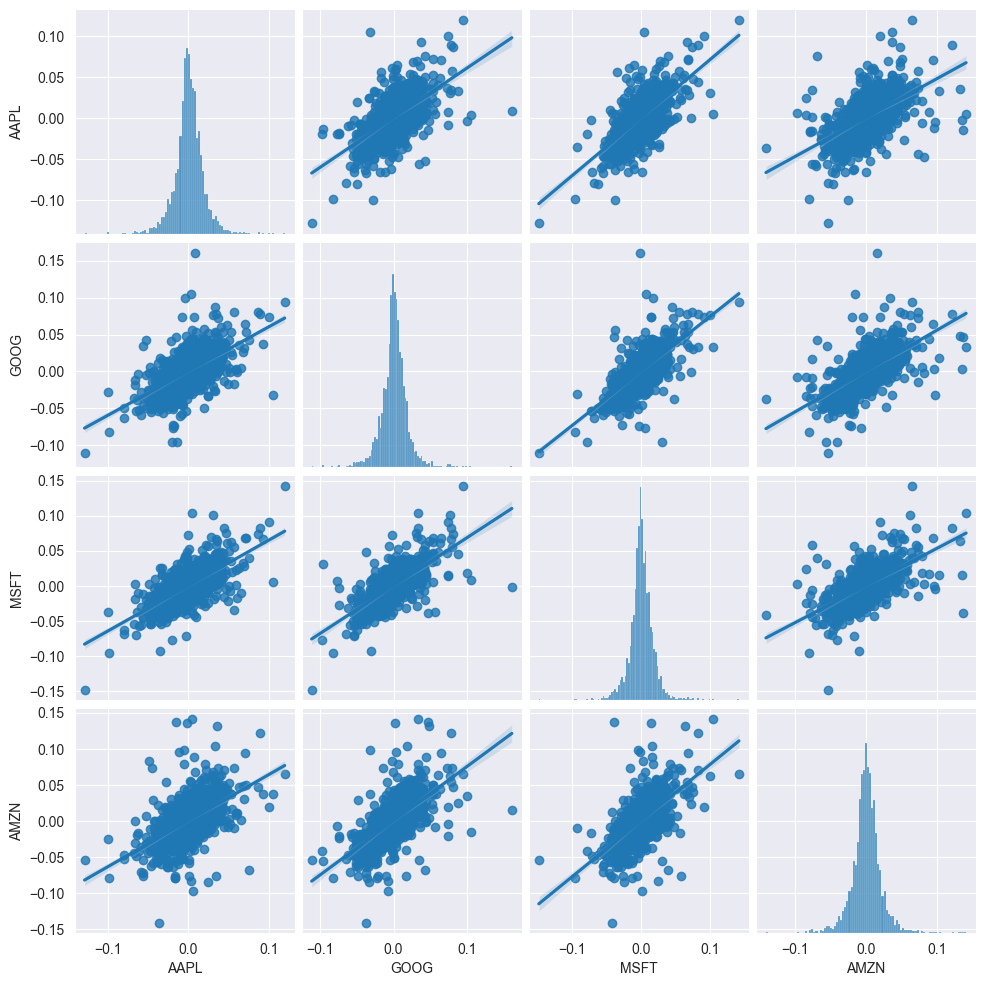

In [56]:
sns.pairplot(df_cp, kind='reg')

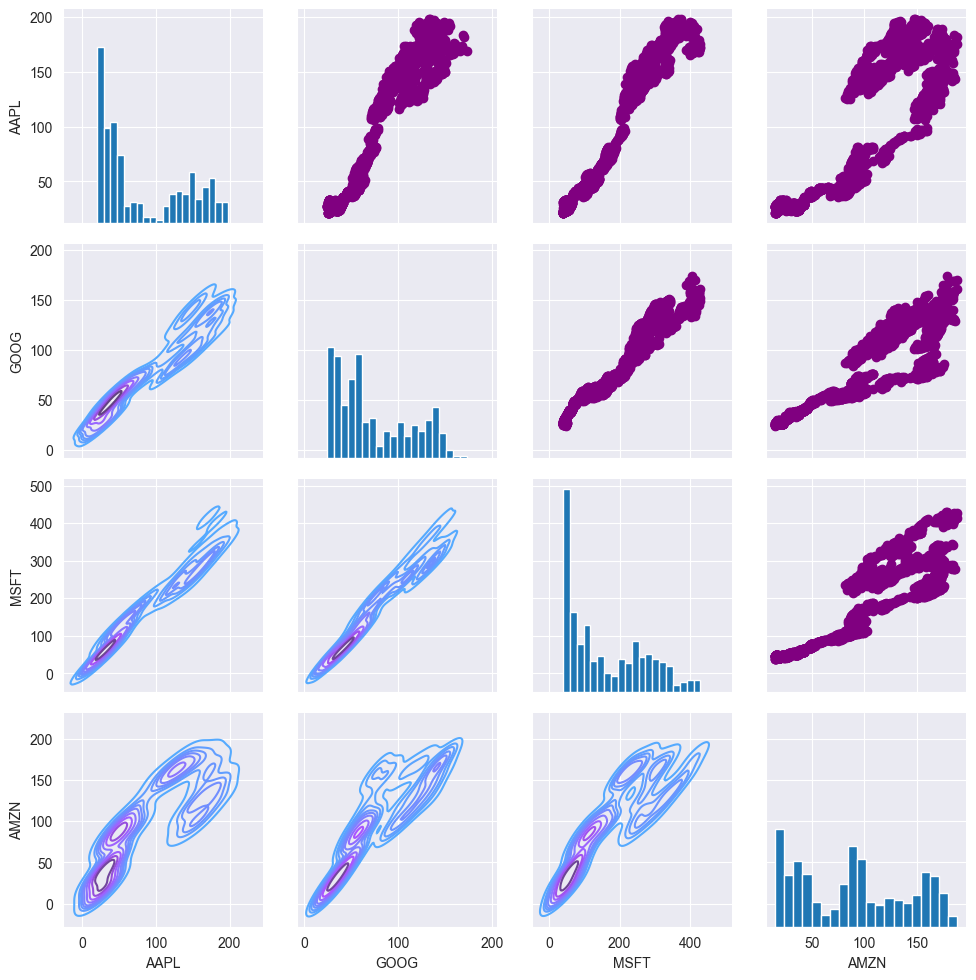

In [57]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(df_close)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=20)

Text(0.5, 1.0, 'Correlation of stock closing price')

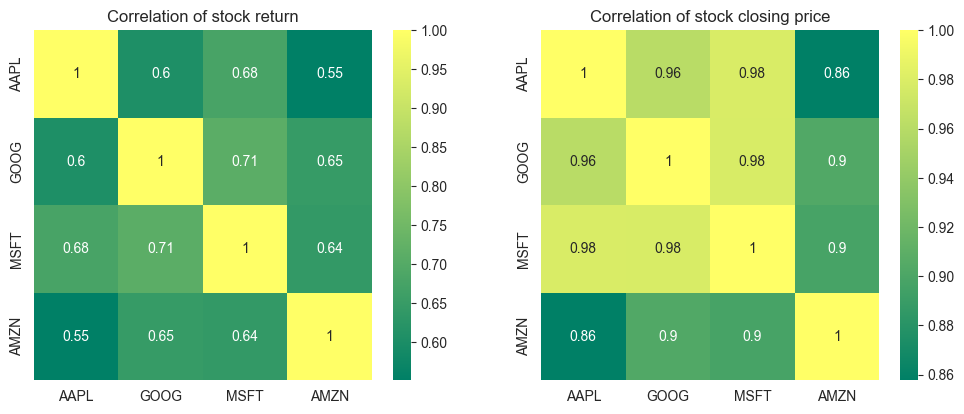

In [58]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(df_cp.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(df_close.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

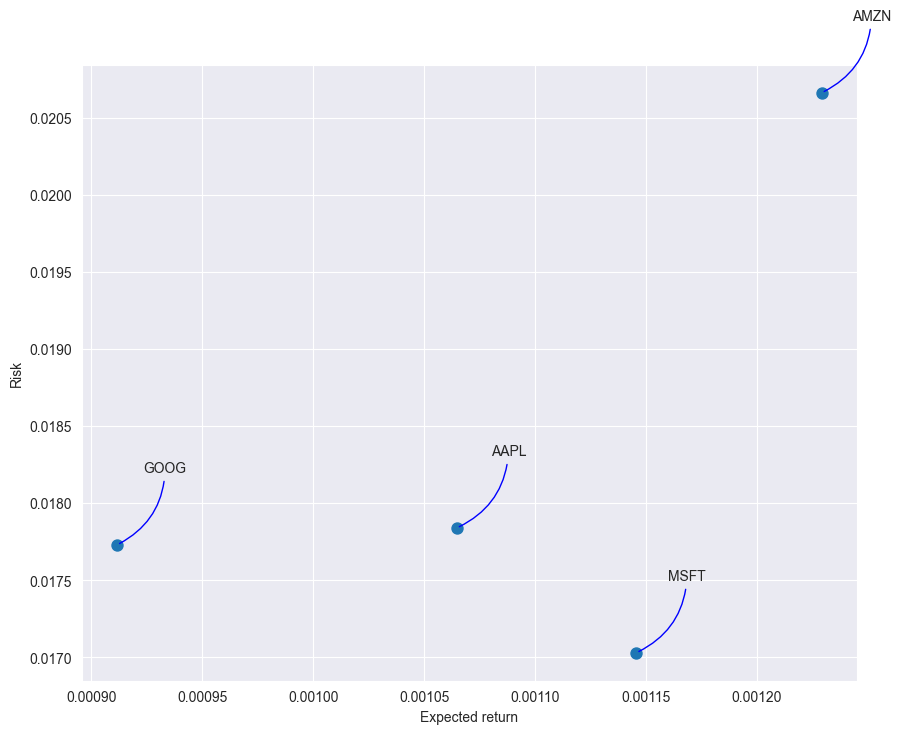

In [59]:
rets = df_cp.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))